#### Notebook for running SONATA on t_branch dataset

Replicate our results for t_branch dataset reported in SONATA: Disambiguated manifold alignment of single-cell data.

In [1]:
import sonata

import numpy as np
np.seterr(under='ignore')
import warnings
warnings.filterwarnings("ignore")

#### 1. load data

In [3]:
data_url1 = "../../data/t_branch/domain1.txt"
data1 = sonata.util.load_data(data_url1)

#### 2. Run SONATA

In [4]:
sigma = 0.1
sn_instance = sonata.model.sonata(sigma=sigma)
ambiguous_groups = sn_instance.check_ambiguity(data1)

======================Running SONATA======================
===> constructing knn graph ...
final k = 10
===> calculating cell-wise ambiguity ...
===> calculating group-wise ambiguity ...
deciding best k for clustering ...
K = 2 groups choosen by elbow method
There are 2 ambiguity groups.


#### 3. Using SONATA to generate self-ambiguity mappings

In [5]:
sonata_mapping_result = sn_instance.mapping_mat(data1, ambiguous_groups)

#### 4. Using SONATA to generate alternaltive solutions for manifold 

##### 4.1 Run a manifold aligner

In [11]:
data_url2 = "../../data/t_branch/domain2.txt"
data2 = sonata.util.load_data(data_url2)
scot_instance = sonata.scotv1.SCOT(data1, data2)
scot_instance.align(k=10, e=1e-3, metric="euclidean", normalize=False)
scot_instance.coupling

======================Running SCOT======================
It.  |Err         
-------------------
    0|7.674563e-03|
   10|5.386003e-12|


array([[2.25100312e-04, 2.33387044e-04, 1.49554469e-04, ...,
        8.37042385e-81, 8.45142022e-81, 8.36994981e-81],
       [2.14438122e-04, 2.22276236e-04, 1.73008009e-04, ...,
        2.56441882e-82, 2.58923341e-82, 2.56427359e-82],
       [1.03392497e-04, 8.92497648e-05, 2.87079919e-04, ...,
        8.39672754e-88, 8.47797781e-88, 8.39625202e-88],
       ...,
       [4.18840868e-71, 5.24660213e-72, 1.00876244e-74, ...,
        3.18647062e-73, 3.21730137e-73, 3.18629018e-73],
       [4.18840868e-71, 5.24660213e-72, 1.00876244e-74, ...,
        3.18647062e-73, 3.21730137e-73, 3.18629018e-73],
       [4.18840868e-71, 5.24660213e-72, 1.00876244e-74, ...,
        3.18647062e-73, 3.21730137e-73, 3.18629018e-73]])

##### 4.2. Generate alternaltive solutions

In [14]:
manifold_alternaltive_mappings = sn_instance.smap2amap(sonata_mapping_result, scot_instance.coupling)

#### 5. Visualization

##### 5.1 visualize domain data

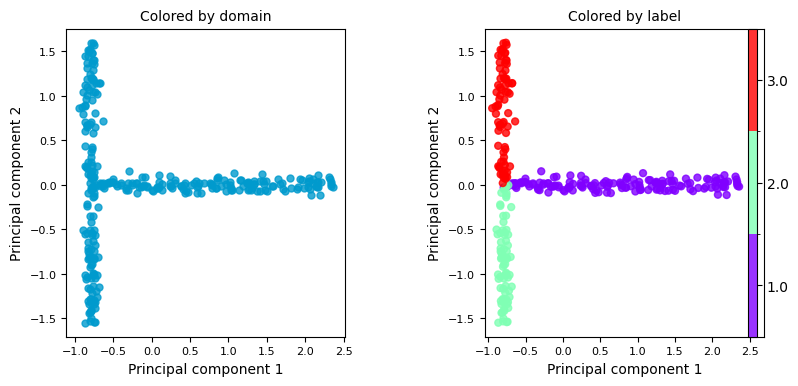

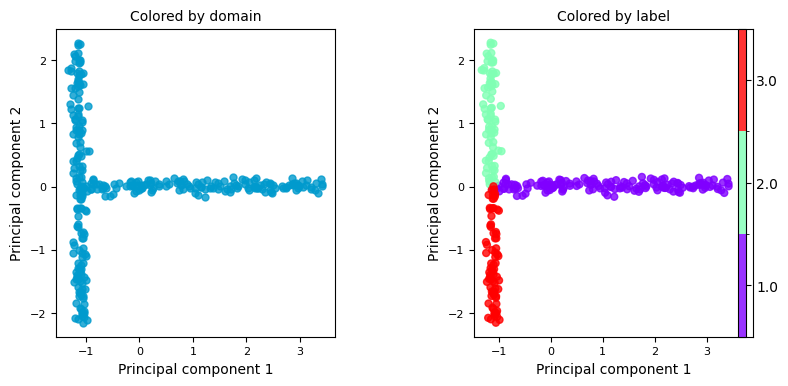

In [16]:
label_url1 = "../../data/t_branch/label_domain1.txt"
label_url2 = "../../data/t_branch/label_domain2.txt"
label1 = sonata.util.load_data(label_url1)
label2 = sonata.util.load_data(label_url2)
sonata.vis.plt_domain_by_labels(data1, label1)
sonata.vis.plt_domain_by_labels(data2, label2)

##### 5.2 visualize mutually ambiguity groups

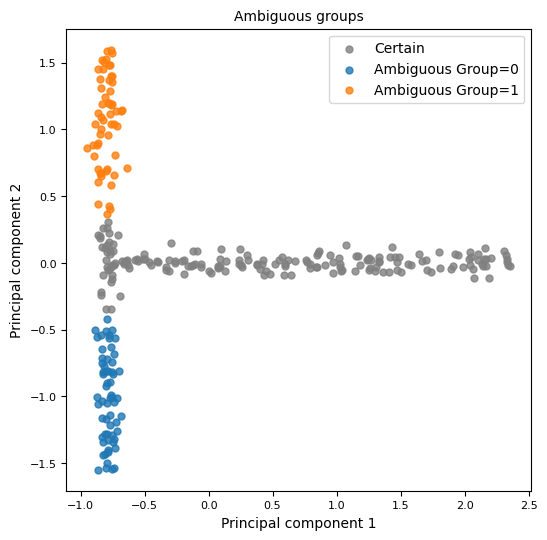

In [17]:
sonata.vis.plt_ambiguous_groups(data1, ambiguous_groups)

##### 5.3 visualize ambiguity cells

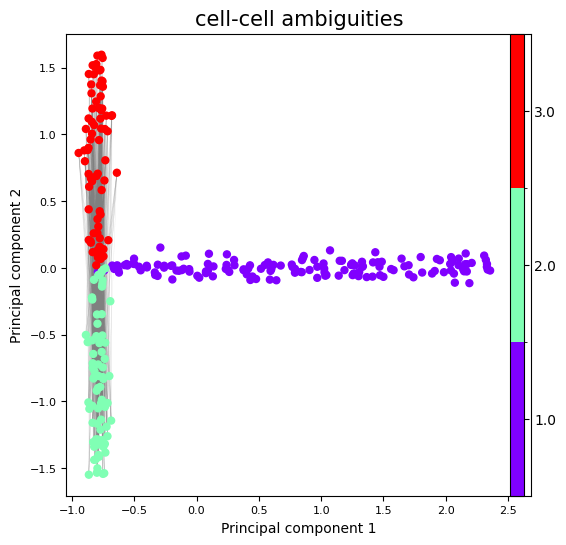

In [18]:
sonata.vis.plt_cannotlink_by_labels(data1, label1, ambiguous_groups, sn_instance.ambiguous_links, curve_style=True) 